# Clasificación II: Cancer de Seno

Las aplicaciones del aprendizaje automatico de máquinas en el campo médico es una de las áreas de trabajo del profesor Alexander. Por esta razón el no podia dejar a un lado utilizar datos de este campo para evaluar el conocimiento de los alumnos en Clasificación lineal. Para este problema el profesor usara la base de datos sobre Cancer de Seno. Está base de datos esta descrita en el UCI repository y se puede desargar directamente de los databease que tiene la libreria scikit-learn de python. Está base de dato tiene un conjunto de datos extraidos de una imagen de seno, estos datos describen las caracteristicas de las masas que pueden ser tumores benignos o malignos. El profesor Alexander quiere que ustedes utilicen sus conocimientos en Machine Learning para diseñar un clasificador que sea capaz de predecir si un tumor de seno es maligno o no, basado en la información porporcionada en la base de datos.

Para este proposito el Profesor Alexander dividio el problema en las siguientes tareas:

1. Cargen los datos *breast_cancer* de la librería scikit learn.
2. Implementen un clasificador usando KNN. Determine una forma de evaluar el rendimiento de este clasificador para diferentes valores de K.
3. Implemente un clasificador utilizando regresión logistica. Busque una manera de poder visualizar esos datos de tal forma que se puedan dibujar las regiones de desición en una grafica 2D.
4. Analice los valores del parametro $\theta$ del clasificador, grafiquelos y comparelos con los datos disponibles.

Como el objetivo es evaluar sus conocimientos en clasificación, el profesor Alexander también quiere que contesten las siguientes preguntas:

1. ¿Qué influencia tiene el uso de diferentes valores de K en el clasificador KNN?
2. ¿Qué diferencias hay entre el clasificador utilizando KNN y regresión logistica? ¿Funciona uno mejor que otro?, ¿Porqué?
2. ¿El clasificador de regresión logistica presenta un buen rendimiento? ¿Cómo evaluan su rendimiento?¿Si el rendimiento no es bueno que cree se debe hacer para mejorarlo?
3. ¿Qué relación tienen los parámetros $\theta$ con los datos disponibles para cada clase? ¿Esto le genera alguna idea sobre como se pueden inicializar los valores para este clasificador?
5. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de clasificación y como se aplicó en este proyecto.

Finalmente, el profesor Alexander les pide que entreguen el notebook de jupyter con el código documentado con el análisis de cada una de las partes, es decir una explicación de que hace en cada parte del código; además, deben incluir las respuestas a las preguntas realizadas. Al entregar el notebook, por favor use la convención Grupo_ID_ML.

**Nota:** Recuerden que tienen hasta el **Martes 2 de Marzo** a las 12 de la noche para entregar sus notebooks. Mucha suerte!!



In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

---
## 1.

In [39]:
data, target = load_breast_cancer(return_X_y=True, as_frame=True)

In [40]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [41]:
data_B = data[target == 0]
target_B = target[target == 0]

data_M = data[target == 1]
target_M = target[target == 1]

In [42]:
data_B_train, data_B_test, Y_B_train, Y_B_test = train_test_split(data_B, target_B, test_size = 0.20, random_state = 0)
data_M_train, data_M_test, Y_M_train, Y_M_test = train_test_split(data_M, target_M, test_size = 0.20, random_state = 0)

In [43]:
data_train = pd.concat([data_B_train, data_M_train])
data_test = pd.concat([data_B_test, data_M_test])
Y_train = pd.concat([Y_B_train, Y_M_train])
Y_test = pd.concat([Y_B_test, Y_M_test])

In [52]:
k = 20
accuracies = []
for k_it in range(1,k+1):
    neigh = KNeighborsClassifier(n_neighbors=k_it)
    neigh.fit(data_train, Y_train)
    Y_pred = neigh.predict(data_test)
    accuracies.append(accuracy_score(Y_test, Y_pred))

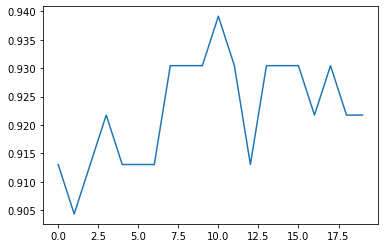

In [57]:
plt.plot(accuracies)